# Turn Sign Classification using NN

- Author: Yiran Jing
- Date: 17 Sep 2020
- Version: 0 (Frist try)

## Content 
1. EDA
2. Data cleanring and Feature Engineering
4. Train and Test model 
5. Interpretation and discuss result

### Dataset description

The data [turn_signs_color_filtered](https://github.com/wallarug/tensorflow-training-ground)

- 2 Main Class: right-turn and left-turn
- The dataset include `52` images
  - 37 colored left turn images
  - 15 colored right turn images


## Model Result 


## Key Limitation of first try model
1. Not enough images, and unbalanced dataset
   - Will have more data in the following weeks
2. NN without any hyper-parameter turning
   - We should learn NN first, and keep improving model
3. No baseline 
   - (Try some basic statistical model, for example, multi-logistic regression, to get some easy understanding insight)
4. No data cleaning 
   - (It is necessary, if our dataset includes some useless images)
4. No feature engineering
   - Create a valuable dataset is as important as training model

In [5]:
import matplotlib.pyplot as plt
from os import listdir, rename, listdir
from pathlib import Path
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Load dataset and visualization

In [3]:
figure_format = 'png'

In [9]:
path = "raw-stop/data1-stop"
left_image_count = len(listdir(path))
print("There are {} colored left turn images.".format(left_image_count))

path = "turn_signs_color_filtered/train/right"
right_image_count = len(listdir(path))
print("There are {} colored right turn images.".format(right_image_count))

There are 853 colored left turn images.
There are 15 colored right turn images.


In [10]:
data_dir = pathlib.Path('raw-stop')
image_count = len(list(data_dir.glob('*/*.jpg')))
print("The total number of turning images are {} ".format(image_count))

The total number of turning images are 1398 


In [11]:
left = list(data_dir.glob('data1-stop/*'))
PIL.Image.open(str(left[0]))

In [40]:
right = list(data_dir.glob('right/*'))
PIL.Image.open(str(right[0]))

### Model training

- 80% as training data
- 20% as testing data

In [12]:
# Predefined Hyper-parameter 
epochs = 20
learning_rate = 0.001
batch_size = 64

In [13]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2, # 
  subset="training",
  seed=123,
  #image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1398 files belonging to 5 classes.
Using 1119 files for training.


In [14]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  #image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1398 files belonging to 5 classes.
Using 279 files for validation.


In [15]:
class_names = train_ds.class_names
print(class_names) # we only consider 2 classes here.

['data1-stop', 'data1a-stop', 'data2-stop', 'data3-stop', 'data4-stop']


#### Visualization training data

before we train the model, let's firstly, visualize some training data

From image below, we can see that 

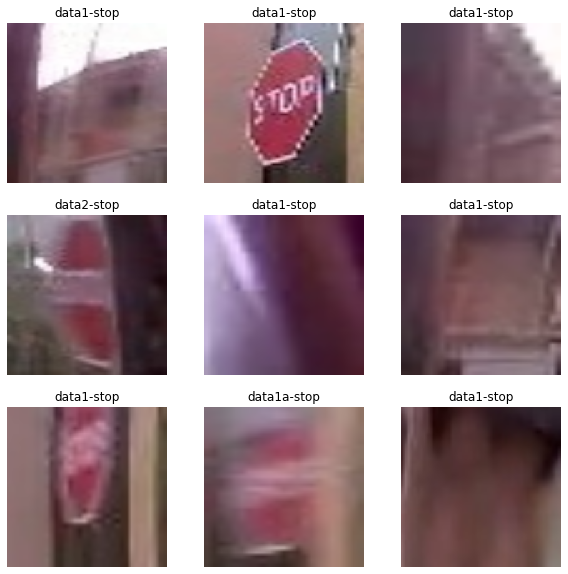

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")